In [78]:
#I want to make a program that traces the development of people with corona
#for this, I want to use the statistics provided on https://www.worldometers.info
#I want to trace:
    #the time where the scrape was made
        #is it possible to only update when new information is provided?
    #the country
    #the infected-number for each country
    #the death-number for each country

In [79]:
#looking at the original data already downloaded:
import pandas as pd
newfile=pd.read_excel("coronaglobalstats.xlsx")
newfile
type(newfile) # dataframe
newfile.keys() #same as newfile.columns-command

Index(['timestamp', 'country', 'cases', 'deaths', 'recovered'], dtype='object')

In [4]:
import requests as rq
from bs4 import BeautifulSoup
url="https://www.worldometers.info/coronavirus/"

In [5]:
#because I cannot just open a link with B.S., I need to use an HTTP client
urlstring=rq.get(url).text
soup=BeautifulSoup(urlstring,"html.parser")

In [6]:
#it seems like each row in the table is a td in a tr in the first tbody:
#<tr style="" role="row" class="even">
##COUNTRY<td style="font-weight: bold; font-size:15px; text-align:left;"> Morocco </td>
##TOTALC<td style="font-weight: bold; text-align:right" class="">6</td>
#NEWC<td style="font-weight: bold; text-align:right;"> </td>
##TOTALD<td style="font-weight: bold; text-align:right;" class="sorting_1"> 1 </td>
#NEWD<td style="font-weight: bold; text-align:right;"> </td>
#RECOVERED<td style="font-weight: bold; text-align:right"> </td>
#ACTIVE<td style="text-align:right;font-weight:bold;"> 5 </td>
#SERIOUS<td style="font-weight: bold; text-align:right">1 </td>
#PER 1M POP<td style="font-weight: bold; text-align:right" class="">0.2</td> </tr>
###soup.find("tbody") #det ligger her!

In [7]:
soup.td

<td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/china/">China</a></td>

In [8]:
soup.td.text

'China'

In [9]:
trs=soup.find_all("tr")
trs

[<tr>
 <th width="100">Country,<br>Other</br></th>
 <th width="20">Total<br>Cases</br></th>
 <th width="30">New<br>Cases</br></th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Tot Deaths/<br/>1M pop</th>
 </tr>, <tr style="">
 <td style="font-weight: bold; font-size:15px; text-align:left;"><a class="mt_a" href="country/china/">China</a></td>
 <td style="font-weight: bold; text-align:right">81,218</td>
 <td style="font-weight: bold; text-align:right;background-color:#FFEEAA;">+47</td>
 <td style="font-weight: bold; text-align:right;">3,281                                </td>
 <td style="font-weight: bold; text-align:right;background-color:red; color:white">+4</td>
 <td style="font-weight: bold; text-align:right">73,650</td>
 <td style="text-align:right;font-weight:bold;">4,287</t

In [10]:
#we need:
#country,deaths,cases,recovered,timeset

In [11]:
soup.find_all("td")[2].text

'+47'

In [12]:
#først scrape eksisterende materiale
import datetime
import requests as rq
records=[]

#we skip trs[0] as it contains title and other annoying non-td-stuff

for element in trs[1:]:
    time=datetime.datetime.now()
    country=element.find("a"=="mt_a").text.strip()
    infect=element.find_all("td")[1].text
    dead=element.find_all("td")[3].text
    recovered=element.find_all("td")[5].text
    records.append((time,country,infect,dead,recovered))#infected,dead,recovered,time))

records

IndexError: list index out of range

In [13]:
infect

'436,820'

In [14]:
#lave det scrapede til en dataframe
import pandas as pd
df2=pd.DataFrame(records,columns=["timestamp","country","cases","deaths","recovered"])
df2["timestamp"]=pd.to_datetime(df2["timestamp"])

In [15]:
### newlist skal sammen med records via concat-metoden
dfcomb=pd.concat([newfile,df2],ignore_index=True)
#type(records) = list = bad

In [16]:
dfcomb

,timestamp,country,cases,deaths,recovered
0,2020-03-13 16:11:09.957000,China,"80,815","3,177","64,152"
1,2020-03-13 16:11:09.958000,Italy,"15,113","1,016","1,258"
2,2020-03-13 16:11:09.958000,Iran,"11,364",514,"3,529"
3,2020-03-13 16:11:09.958000,S. Korea,"7,979",71,510
4,2020-03-13 16:11:09.958000,Spain,"4,209",120,189
...,...,...,...,...,...
2714,2020-03-25 13:41:38.208083,Somalia,1,,
2715,2020-03-25 13:41:38.208245,Syria,1,,
2716,2020-03-25 13:41:38.208470,Timor-Leste,1,,
2717,2020-03-25 13:41:38.208752,Turks and Caicos,1,,


In [17]:
#overflyttes til excel:
dfcomb.to_excel("coronaglobalstats.xlsx",index=None)

# Leg med data fra scraping her:

In [18]:
import matplotlib.pyplot as plt

In [19]:
type(dfcomb)

pandas.core.frame.DataFrame

In [20]:
#need the data to be without commas...
dfstats=dfcomb.replace(to_replace=",",value="",regex=True)
#and yet numeric:
dfstats["cases"]=pd.to_numeric(dfstats["cases"])
dfstats["deaths"]=pd.to_numeric(dfstats["deaths"],errors="coerce")
dfstats["recovered"]=pd.to_numeric(dfstats["recovered"],errors="coerce")

In [21]:
type(dfstats["timestamp"][1])

pandas._libs.tslibs.timestamps.Timestamp

In [22]:
China_deaths=dfstats[(dfstats["country"]=="Italy")]
China_deaths

,timestamp,country,cases,deaths,recovered
1,2020-03-13 16:11:09.958000,Italy,15113,1016.0,1258.0
136,2020-03-13 16:34:21.412000,Italy,15113,1016.0,1258.0
271,2020-03-13 22:56:27.214000,Italy,15113,1016.0,1258.0
406,2020-03-14 17:39:13.324000,Italy,17660,1266.0,1439.0
557,2020-03-15 13:02:56.777000,Italy,21157,1441.0,1966.0
714,2020-03-15 19:42:54.384000,Italy,24747,1809.0,2335.0
873,2020-03-16 08:40:23.801000,Italy,24747,1809.0,2335.0
1032,2020-03-17 10:07:03.954000,Italy,27980,2158.0,2749.0
1196,2020-03-19 10:04:03.125000,Italy,35713,2978.0,4025.0
1374,2020-03-20 07:47:36.522000,Italy,41035,3405.0,4440.0


In [80]:
type(China_deaths["timestamp"][1])

pandas._libs.tslibs.timestamps.Timestamp

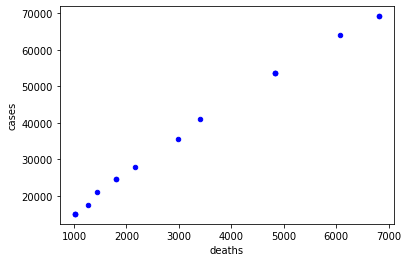

In [23]:
China_deaths.plot(kind="scatter",x="deaths",y="cases",color="blue")

In [30]:
#?datetime

In [31]:
datetime.datetime.now()

datetime.datetime(2020, 3, 25, 13, 42, 3, 687305)

In [32]:
 #time.replace(hour=self.hour, minute=self.minute,
    #second=self.second, microsecond=self.microsecond, tzinfo=self.tzinfo, * fold=0)

In [33]:
import matplotlib.dates as dtm

In [34]:
import pandas as pd
file=pd.read_excel("coronaglobalstats.xlsx")

In [35]:
dfstats.describe()

,cases,deaths,recovered
count,2719.000000,1065.000000,1393.000000
mean,2851.888194,301.310798,1978.776741
std,21418.425429,1490.176079,11804.823416
min,1.000000,1.000000,1.000000
25%,5.000000,1.000000,2.000000
50%,37.000000,3.000000,6.000000
75%,205.500000,15.000000,29.000000
max,436820.000000,19637.000000,111878.000000


In [37]:
#?pd.read_excel

In [38]:
#hvad jeg gerne vil gøre nu:
#bruge tiden til at lave en graf over udviklingen over tid
#-> skal finde ud af hvordan timestamp i pandas virker og datetime. i python

# Timestamping stuff and plotting them as well:

In [39]:
dfstats

,timestamp,country,cases,deaths,recovered
0,2020-03-13 16:11:09.957000,China,80815,3177.0,64152.0
1,2020-03-13 16:11:09.958000,Italy,15113,1016.0,1258.0
2,2020-03-13 16:11:09.958000,Iran,11364,514.0,3529.0
3,2020-03-13 16:11:09.958000,S. Korea,7979,71.0,510.0
4,2020-03-13 16:11:09.958000,Spain,4209,120.0,189.0
...,...,...,...,...,...
2714,2020-03-25 13:41:38.208083,Somalia,1,NaN,NaN
2715,2020-03-25 13:41:38.208245,Syria,1,NaN,NaN
2716,2020-03-25 13:41:38.208470,Timor-Leste,1,NaN,NaN
2717,2020-03-25 13:41:38.208752,Turks and Caicos,1,NaN,NaN


In [43]:
withoutsecondslist=[]
for element in dfstats["timestamp"]:
    zero=element.replace(minute=0,second=0,microsecond=0)
    withoutsecondslist.append(zero)


In [76]:
dfstats.update({"timestamp":withoutsecondslist})

In [45]:
dfstats

,timestamp,country,cases,deaths,recovered
0,2020-03-13 16:00:00,China,80815,3177.0,64152.0
1,2020-03-13 16:00:00,Italy,15113,1016.0,1258.0
2,2020-03-13 16:00:00,Iran,11364,514.0,3529.0
3,2020-03-13 16:00:00,S. Korea,7979,71.0,510.0
4,2020-03-13 16:00:00,Spain,4209,120.0,189.0
...,...,...,...,...,...
2714,2020-03-25 13:00:00,Somalia,1,NaN,NaN
2715,2020-03-25 13:00:00,Syria,1,NaN,NaN
2716,2020-03-25 13:00:00,Timor-Leste,1,NaN,NaN
2717,2020-03-25 13:00:00,Turks and Caicos,1,NaN,NaN


In [46]:
type(dfstats["timestamp"][1])

pandas._libs.tslibs.timestamps.Timestamp

In [67]:
import matplotlib.dates as pltdates

In [69]:
tester=pltdates.date2num(dfstats["timestamp"][1])
tester

737497.6666666666

In [63]:
dfstats["timestamp"][1]

Timestamp('2020-03-13 16:00:00')

In [64]:
matplotlib.dates.num2date(tester)

datetime.datetime(2020, 3, 13, 16, 0, tzinfo=datetime.timezone.utc)

In [66]:
#spændende! Vi har altså her nogle slet ikke tilfældige tal når de omdannes!

In [81]:
forstats=[]
for element in dfstats["timestamp"]:
    nusomfloat=pltdates.date2num(element)
    forstats.append(nusomfloat)
#okay, forstats looks messy but seems to be pretty valid still

In [83]:
dfstats

,timestamp,country,cases,deaths,recovered
0,2020-03-13 16:00:00,China,80815,3177.0,64152.0
1,2020-03-13 16:00:00,Italy,15113,1016.0,1258.0
2,2020-03-13 16:00:00,Iran,11364,514.0,3529.0
3,2020-03-13 16:00:00,S. Korea,7979,71.0,510.0
4,2020-03-13 16:00:00,Spain,4209,120.0,189.0
...,...,...,...,...,...
2714,2020-03-25 13:00:00,Somalia,1,NaN,NaN
2715,2020-03-25 13:00:00,Syria,1,NaN,NaN
2716,2020-03-25 13:00:00,Timor-Leste,1,NaN,NaN
2717,2020-03-25 13:00:00,Turks and Caicos,1,NaN,NaN


In [82]:
type(forstats)

list

In [85]:
type(withoutsecondslist)
#however, this does not want to be put into pandas, as it isn't a timestamp-format
#perhaps it's better, then, to use the regular datetime-expressions (just not through
#scatter plots, according to a bug in pandas, apparently)

list

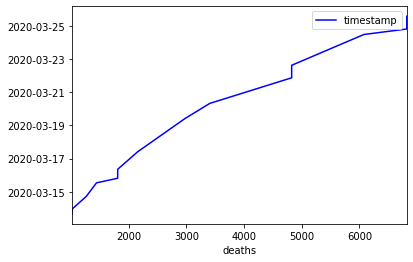

In [86]:
China_deaths.plot(x="deaths",y="timestamp",color="blue")

In [88]:
China_deaths.plot(kind="scatter",x="timestamp",y="deaths",color="blue")

ValueError: scatter requires x column to be numeric